In [1]:
import numpy as np
import matplotlib.pyplot as plt

3. Write the Taylor series expansion for $e^{x{^2}}$ around $a = 0.$                                    
Write a function `my_double_exp(x, n)`, which computes an approximation of $e^{x{^2}}$ using the first $n$ terms of the Taylor series expansion. Be sure that `my_double_exp` can take array inputs.

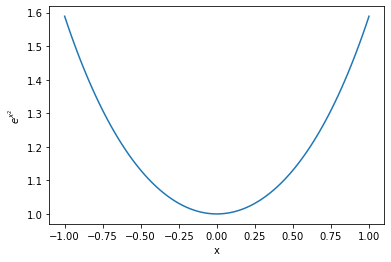

In [2]:
def my_double_exp(x, n):
    result = np.zeros_like(x)  # Initialize array for the result
    
    for i in range(n):
        term = ((2**i) * (x**((2*i)+2))) / np.math.factorial((2*i)+2)
        result += term
    
    return result + 1  # Add the constant term 1

# Example usage:
x = np.linspace(-1, 1, 100)
approximation = my_double_exp(x, 5)

plt.plot(x,approximation)
plt.xlabel('x')
plt.ylabel(r'$e^{x{^2}}$')
plt.show()

4. Write a function that gives the Taylor series approximation to the `np.exp` function around 0 for an order 1 through 7. Calculate the truncation error bound for order 7.

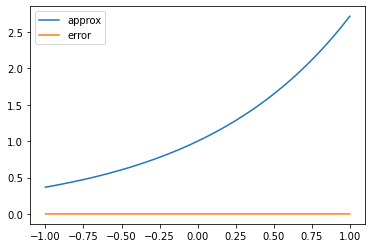

In [3]:
def taylor_exp_approx(x, order):
    approximation = np.zeros_like(x)  # Initialize array for the approximation
    error_bound = np.zeros_like(x)  # Initialize array for the truncation error bound

    for n in range(order + 1):
        term = x**n / np.math.factorial(n)
        approximation += term

    if order >= 7:
        next_term = x**(order + 1) / np.math.factorial(order + 1)
        error_bound = np.abs(next_term)

    return approximation, error_bound

x = np.linspace(-1, 1, 100)
approximation, error_bound = taylor_exp_approx(x, 7)
plt.plot(x,approximation,label='approx')
plt.plot(x,error_bound,label='error')
plt.legend()

5. Compute the fourth order Taylor expansion for $sin(x)$ and $cos(x),$ and $sin(x) cos(x)$ around 0, which produces a smaller error for $x = π/2.$ Which is correct: computing separately Taylor expansion for sin and cos and then multiplying the result together, or computing the Taylor expansion for the product first and then plugging in $x?$

Error for sin(x): 0.0
Error for cos(x): 0.0
Error for sin(x)*cos(x): 1.0


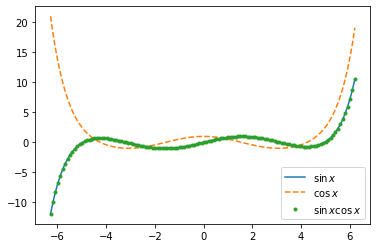

In [4]:
def taylor_sin(x, order):
    approximation = np.zeros_like(x)  # Initialize array for the approximation

    for n in range(order + 1):
        term = (-1)**n * x**(2*n + 1) / np.math.factorial(2*n + 1)
        approximation += term

    return approximation

def taylor_cos(x, order):
    approximation = np.zeros_like(x)  # Initialize array for the approximation

    for n in range(order + 1):
        term = (-1)**n * x**(2*n) / np.math.factorial(2*n)
        approximation += term

    return approximation

def taylor_sin_cos(x, order):
    approximation = np.zeros_like(x)  # Initialize array for the approximation

    for n in range(order + 1):
        term = (-1)**n * x**(2*n + 1) / np.math.factorial(2*n + 1)
        approximation += term

    return approximation

y=np.arange(-2*np.pi,2*np.pi,0.1)
plt.plot(y,taylor_sin(y, 4),label=r'$\sin x$')
plt.plot(y,taylor_cos(y, 4),'--',label=r'$\cos x$')
plt.plot(y,taylor_sin_cos(y, 4),'.',label=r'$\sin x \cos x$')
plt.legend()
x = np.pi/2

sin_approximation = taylor_sin(x, 4)
cos_approximation = taylor_cos(x, 4)
sin_cos_approximation = taylor_sin_cos(x, 4)

sin_error = np.abs(np.sin(x) - sin_approximation)
cos_error = np.abs(np.cos(x) - cos_approximation)
sin_cos_error = np.abs(np.sin(x)*np.cos(x) - sin_cos_approximation)

print("Error for sin(x):", sin_error.round(2))
print("Error for cos(x):", cos_error.round(2))
print("Error for sin(x)*cos(x):", sin_cos_error.round(2))

By comparing the errors, we can determine which approach produces a smaller error for $x = \frac{\pi}{2}$.

6. Use the fourth order Taylor series to approximate $\cos(0.2)$ and determine the truncation error bound.

In [5]:
x = 0.2
approximation = 1 - (x**2)/2 + (x**4)/24 - (x**6)/720

print("Approximation:", approximation)

Approximation: 0.9800665777777777


To determine the truncation error bound, we can find the absolute value of the next term in the Taylor series,                                                                                      
which is the term with $x^8$. Since we are using the fourth-order approximation, the truncation error bound can be estimated by evaluating the next term at $x = 0.2$:

In [6]:
truncation_error = np.abs((x**8) / np.math.factorial(8))

print("Truncation Error Bound:", truncation_error)

Truncation Error Bound: 6.349206349206352e-11


7. Write a function `my_cosh_approximator(x, n)` where output is the nth order Taylor series approximation for $\cosh(x)$, the hyperbolic cosine of $x$ taken around $a = 0.$ You may assume that $x$ is an array, and $n$ is a positive integer (including zero). Recall that
$$ \cosh(x) = \frac{(e^x + e^{-x})}{2}$$
Warning: The approximations for $n = 0$ and $n = 1$ will be equivalent,                           
    and the approximations for $n = 2$ and $n = 3$ will be equivalent, etc.

In [7]:
def my_cosh_approximator(x, n):
    approximation = 0.0
    
    for k in range(n+1):
        numerator = np.exp(x) + np.exp(-x)
        denominator = 2**k * np.math.factorial(k)
        term = numerator / denominator
        approximation += term
    
    return approximation

x = 2.0
n = 4
approximation = my_cosh_approximator(x, n)

print("Approximation:", approximation)

Approximation: 12.403488919041347
